# Next level timeseries analysis

## Ideas

- App (fast api + react)!
- Use available apis for retrieving crypto data
- Multiple crypto comparison, create protfolio for next n days (Use evolutionary algorithms to create portfolio )
- Stripe for payment 
- Markov chains, Black-Scholz (?)
- News tracking, news classification for crypto
- Use LLM 
- 

98


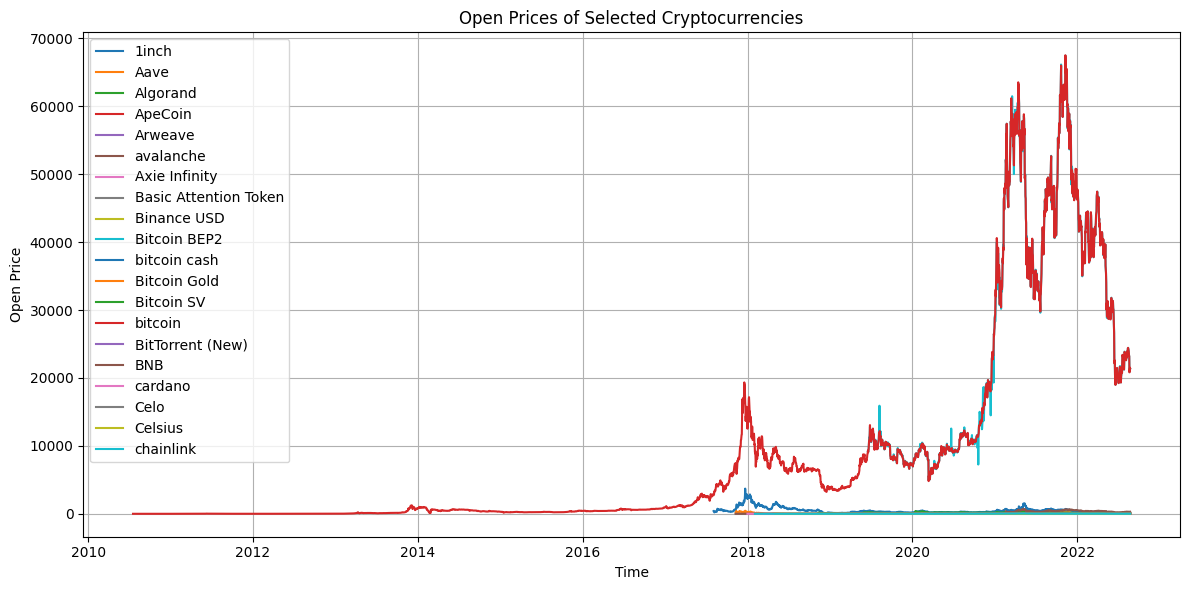

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

path = '../resources/Top 100 Crypto Coins'
crypto_data = {}


for filename in os.listdir(path):
    if filename.endswith('.csv'):
        file_path = os.path.join(path, filename)

        df = pd.read_csv(file_path)

        if 'Date' not in df.columns or 'Open' not in df.columns:
            continue

        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')
        df.set_index('Date', inplace=True)

        coin_name = filename.replace('.csv', '')
        crypto_data[coin_name] = df

print(len(crypto_data))

selected_coins = list(crypto_data.keys())[:20]

# for coin in selected_coins:
#     print(f"\n{coin} - Open prices:")
#     display(crypto_data[coin][['Open']].head())

plt.figure(figsize=(12, 6))

for coin in selected_coins:
    df = crypto_data[coin]

    plt.plot(
        df.index,
        df['Open'],
        label=coin
    )

plt.title('Open Prices of Selected Cryptocurrencies')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

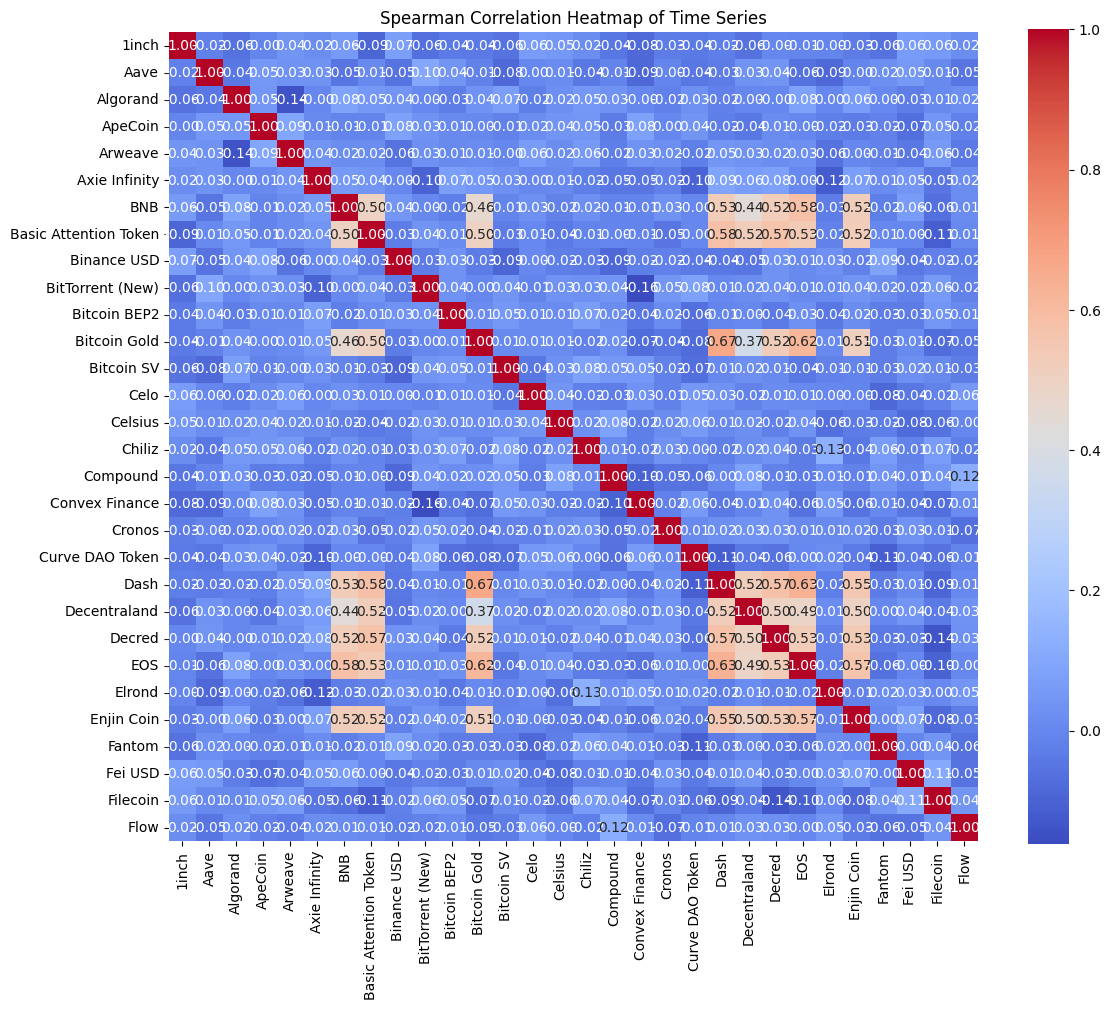

In [12]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.DataFrame()

crypto_data_filtered = {
    k: df
    for k, df in crypto_data.items()
    if 'Open' in df.columns
}

first_n_crypto = dict(
    (k, crypto_data_filtered[k])
    for k in sorted(crypto_data_filtered.keys())[:30]
)

def add_open_diff_column(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df['open_diff'] = [0] + list(df['Open'][:-1].values - df['Open'][1:].values)
    return df

for name, df in first_n_crypto.items():
    first_n_crypto[name] = add_open_diff_column(df)

for name, df in first_n_crypto.items():
    if 'open_diff' in df.columns:
        combined_df[name] = df['open_diff']
    else:
        print(f"Warning: '{name}' has no 'open_diff' column")

# Step 3: Drop rows with missing values
combined_df.dropna(inplace=True)

# Step 4: Compute Spearman correlation matrix
spearman_corr = combined_df.corr(method='spearman')

# Step 5: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Spearman Correlation Heatmap of Time Series')
plt.tight_layout()
plt.show()

## Timeseries prediction via portfolio fitness function GA

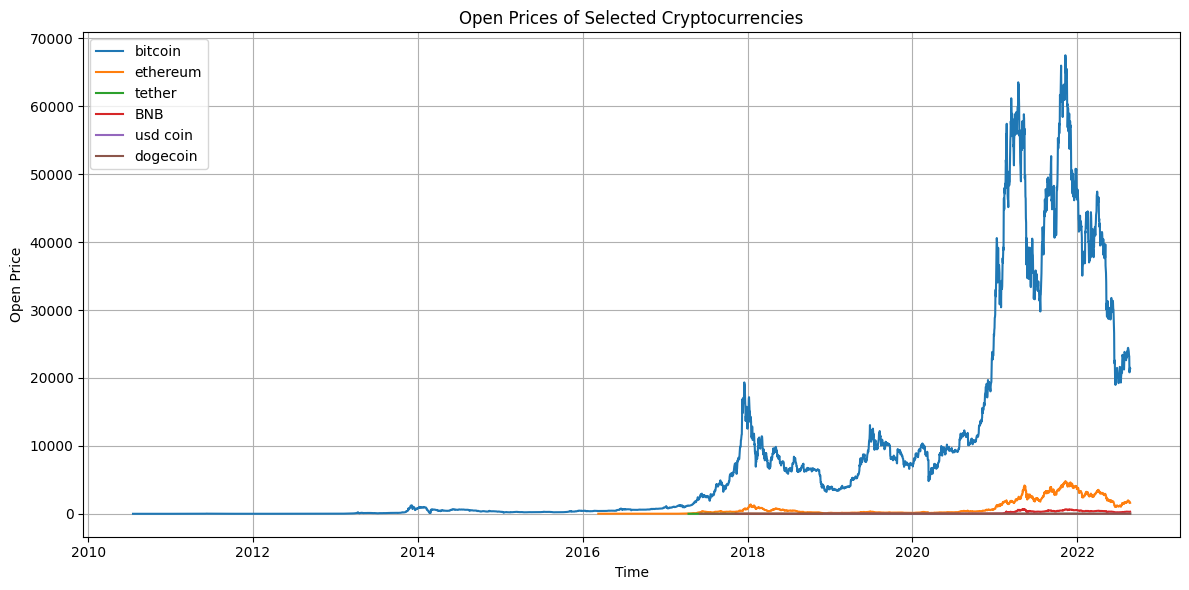

In [ ]:
selected_currencies = {'btc': 'bitcoin', 'eth': 'ethereum', 'usdt': 'tether', 'bnb': 'BNB', 'usdc': 'usd coin', 'doge': 'dogecoin'}
metrics = ['return', 'volatility', 'momentum', 'moving_average', 'rsi', 'macd']

plt.figure(figsize=(12, 6))

for coin in selected_currencies.values():
    df = crypto_data[coin]

    plt.plot(
        df.index,
        df['Open'],
        label=coin
    )

plt.title('Open Prices of Selected Cryptocurrencies')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()